In [2]:
import torch
from torch import atan
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate  import lagrange
from sympy import symbols, integrate, sinh, E, diff
import sympy as sp
from scipy.special import roots_legendre


In [3]:
p, w = np.polynomial.legendre.leggauss(1)
f = lambda x: 4.0/(1 + x*x)
ans = 0.5*f(0.5*p + 0.5).dot(w)
print(ans)

3.2


In [4]:
x = symbols('x')
u = -2*E/(E**2 - 1)*sinh(x) + x
print(integrate(u, (x, 0, 1)).evalf())


0.0378828427399902


In [5]:
def f(x):
    return -2*E/(E**2 - 1)*sinh(x) + x
def G_integrate(u, x, N=3, scale=(0, 1)):
    N=N #取3个样本点
    a,b = scale #积分上下限
    x,w = roots_legendre(N)

    xp = x*(b-a)/2+(b+a)/2
    wp = w*(b-a)/2

    s = 0
    for i in range(N):
        s+=wp[i]*u(xp[i])
    return s.evalf()
    



In [6]:
un = 0.14588*x*(1-x) + 0.16279*x**2*(1-x)

du = diff(u, x)

def error(u, uh):
    du = diff(u, x)
    B = integrate((du**2+u**2), (x, 0, 1))
    A = (1/2*B)**0.5
    dut = diff(un-u, x)
    Bt = integrate((dut**2+(un-u)**2), (x, 0, 1))
    At = (1/2*Bt)**0.5
    return float(At.evalf()/A.evalf())
error(u, un)

0.010085711047253657

In [13]:
un.evalf()

0.16279*x**2*(1.0 - x) + 0.14588*x*(1.0 - x)

In [8]:
x = symbols('x')
t = x
f = t**2
A = integrate(f, (x, 0, 1))

A

1/3

In [9]:

def function(x, a, xb):
    dx = torch.tensor(x, requires_grad=True)
    constant = torch.zeros_like(dx)
    for i in range(len(x)):
        constant[i] = a * xb
    dy = (1 - dx) * (atan(a * (dx - xb)) + 
                     atan(constant))
    #print(dx.grad)
    return dy

def lagrange(x, y, num_points, x_test):
    # 所有的基函数值，每个元素代表一个基函数的值
    l = np.zeros(shape=(num_points, ))

    # 计算第k个基函数的值
    for k in range(num_points):
        # 乘法时必须先有一个值
        # 由于l[k]肯定会被至少乘n次，所以可以取1
        l[k] = 1
        # 计算第k个基函数中第k_个项（每一项：分子除以分母）
        for k_ in range(num_points):
            # 这里没搞清楚，书中公式上没有对k=k_时，即分母为0进行说明
            # 有些资料上显示k是不等于k_的
            if k != k_:
                # 基函数需要通过连乘得到
                l[k] = l[k]*(x_test-x[k_])/(x[k]-x[k_])
            else:
                pass 
    # 计算当前需要预测的x_test对应的y_test值        
    L = 0
    for i in range(num_points):
        # 求所有基函数值的和
        L += y[i]*l[i]
    return L

def error(u, uh):
    error = 0
    # for i in range(len(u)):
    #     error+=np.linalg.norm((u[i]-uh[i])/u[i])
    error = (np.linalg.norm(u-uh))/np.linalg.norm(u)
    return error
    

def h_version(x, a, xb):
    dx = torch.tensor(x, requires_grad=True)
    constant = torch.zeros_like(dx)
    for i in range(len(x)):
        constant[i] = a * xb
    dy = (1 - dx) * (atan(a * (dx - xb)) + 
                     atan(constant))

    y = dy.mean()
    y.backward()
    dy_dx = dx.grad
    return dx, dy, dy_dx

def h_plot(dx, dy, dy_dx):
    pass


In [10]:

x = np.linspace(0, 1, 10)
a = 50
xb = 0.8

y = function(x, a, xb)
print('y', y)
# def h(x,y,a):
#     ans=0.0
#     for i in range(len(y)):
#         t=y[i]
#         for j in range(len(y)):
#             if i !=j:
#                 t*=(a-x[j])/(x[i]-x[j])
#         ans +=t
#     return ans
ret = lagrange(x, y.detach().numpy())

print(error(y.detach().numpy(), ret(x)))

y tensor([0.0000, 0.0036, 0.0075, 0.0119, 0.0173, 0.0252, 0.0413, 0.1573, 0.3217,
        0.0000], dtype=torch.float64, grad_fn=<MulBackward0>)


TypeError: lagrange() missing 2 required positional arguments: 'num_points' and 'x_test'

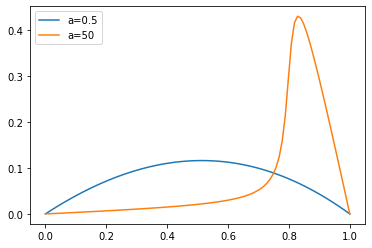

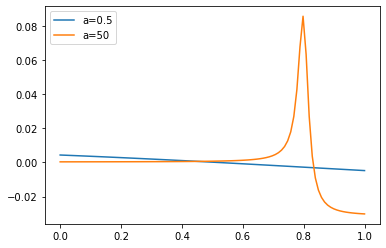

In [ ]:

x = np.linspace(0, 1, 100)
a = [0.5, 50]
xb = 0.8
elem = [2, 4, 6, 16, 32]


    
plt.figure()
for i in range(len(a)):
    dx, dy, dy_dx = h_version(x, a[i], xb)
    plt.plot(dx.detach().numpy(), dy.detach().numpy(), label='a=%s' % a[i])
plt.legend(loc="upper left")
plt.show()

plt.figure()
for i in range(len(a)):
    dx, dy, dy_dx = h_version(x, a[i], xb)
    plt.plot(dx.detach().numpy(), dy_dx.detach().numpy(), label='a=%s' % a[i])

plt.legend(loc="upper left")
plt.show()
